In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import ceil
from tqdm import tqdm
from scipy.fft import fft, ifft

# Q1

In [2]:
# Computing 2D DFT and 2D inverse DFT
# I have used the inbuilt functions for 1D FFT and inverse FFT to compute the 2D DFTs.

def DFT_2D(f):
    # f is an MxN matrix containing values of f(m,n) for 0 <= m <= M-1 and 0 <= n <= N-1
    (M,N) = f.shape
    
    # Compute 1D DFT for each row in f.
    # temp_2ddft is a complex array of size (M,N)
    temp_2ddft = np.array([np.array(fft(f[m,:])) for m in range(M)])

    # Compute 1D DFT column-wise for the result obtained from row-wise DFT.
    # final_2ddft is a complex array of size (M,N)
    final_2ddft = np.array([np.array(fft(temp_2ddft[:,n])) for n in range(N)]).T

    # Return final result for the 2D DFT.
    return final_2ddft

def invDFT_2D(F):
    # F is an MxN matrix containing fourier coefficients of f(m,n) 
    # for 0 <= m <= M-1 and 0 <= n <= N-1
    (M,N) = F.shape

    # Compute inverse DFT for each column in F.
    # temp_inv2ddft is a complex array of size (M,N)
    temp_inv2ddft = np.array([np.array(ifft(F[:,n])) for n in range(N)]).T

    # Compute 1D inverse DFT row-wise for the result obtained from column-wise inverse DFT.
    # final_inv2ddft is a complex array of size (M,N)
    final_inv2ddft = np.array([np.array(ifft(temp_inv2ddft[m,:])) for m in range(M)])

    # Return final result for the 2D inverse DFT obtained.
    return final_inv2ddft




In [3]:
# interchange_phase_helper is a function to interchange the fourier phase of two images, 
# given their fourier transformations.
def interchange_phase_helper(img_dft1, img_dft2):
    # Make sure both images are of the same size
    assert img_dft1.shape == img_dft2.shape

    # Compute the magnitude and phase of each complex fourier coefficient for both the images.
    mag_F1 = np.abs(img_dft1)
    phase_F1 = np.angle(img_dft1)
    mag_F2 = np.abs(img_dft2)
    phase_F2 = np.angle(img_dft2)

    # Compute:
    #   img3_transformed with magnitude of img1 and phase of img2
    #   img4_transformed with magnitude of img2 and phase of img1
    img3_transformed = mag_F1*np.exp(1j*phase_F2)
    img4_transformed = mag_F2*np.exp(1j*phase_F1)

    # Compute 2D inverse DFT for img3_tranformed and img4transformed to obtain img3 and img4.
    img3 = invDFT_2D(img3_transformed)
    img4 = invDFT_2D(img4_transformed)

    # Return img3 and img4
    return img3,img4

def interchange_phase(img1, img2):
    # Fourier transformation for img1 and img2
    F1 = DFT_2D(img1)
    F2 = DFT_2D(img2)

    # Compute img3 and img4 with phase interchanged from img1 and img2 using 
    # the above helper function
    img3,img4 = interchange_phase_helper(F1, F2)

    # Take the real part and convert to integral pixel intensity.
    img3 = np.real(img3).astype(int)
    img4 = np.real(img4).astype(int)
    return img3, img4

    

Text(0.5, 1.0, 'fourier_transform.pgm')

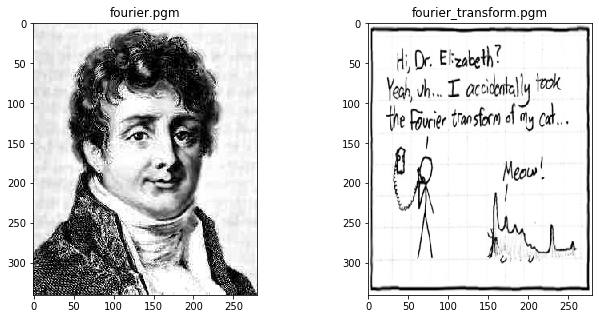

In [4]:
# Plot the 2 images for which phase has to be interchanged
img1 = cv2.imread('fourier.pgm',0)
img2 = cv2.imread('fourier_transform.pgm',0)
f, axs = plt.subplots(1, 2, figsize = (11,5))
axs[0].imshow(img1, cmap = 'gray')
axs[0].set_title("fourier.pgm")
axs[1].imshow(img2, cmap = 'gray')
axs[1].set_title("fourier_transform.pgm")


Text(0.5, 1.0, 'img2 with phase from img1')

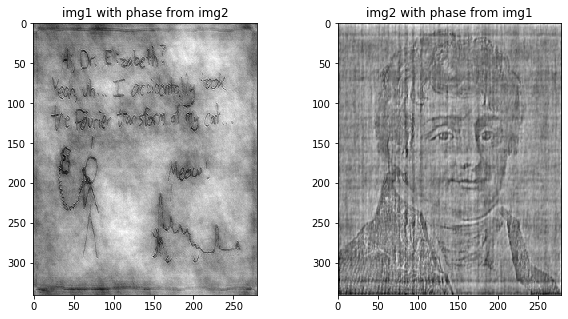

In [5]:
# Plot the images with phases interchanged 
img3, img4 = interchange_phase(img1=img1, img2 = img2)
f, axs = plt.subplots(1, 2, figsize = (10,5))
axs[0].imshow(img3, cmap = 'gray')
axs[0].set_title("img1 with phase from img2")
axs[1].imshow(img4, cmap = 'gray')
axs[1].set_title("img2 with phase from img1")


The first image contains magnitude of F1 and phase of F2 while the second image contains magnitude of F2 and phase of F1, where F1 and F2 are the 2D DFT transformations of fourier.pgm(img1) and fourier_transform.pgm(img2) respectively. 

The property of phase dominance in DFT is clearly seen in this example. The first image bears a lot of resemblance with img2 while the second image has a lot of resemblance with img1. Therefore the phase of each pixel from the fourier transform of an image plays more important role in the image appearance than the magnitude.